In [ ]:
import tensorflow as tf

In [ ]:
# Load the MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


<Figure size 1000x1200 with 0 Axes>

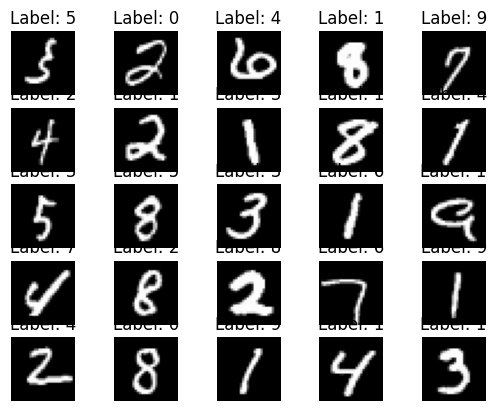

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Select 5 random images from the training set
images = x_train[np.random.randint(0, len(x_train), size=25)]

# Create a 5x5 grid of subplots
plt.figure(figsize=(10, 12))
fig, axes = plt.subplots(5, 5)

# Iterate through the images and labels, and plot each image with its corresponding label
for i, ax in enumerate(axes.flat):
    ax.imshow(images[i], cmap='gray')
    ax.set_title(f"Label: {y_train[i]}")
    ax.axis('off')

# Display the plot
plt.show()

In [ ]:
! pip install tensorflow-addons

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 3.1 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
import tensorflow_addons as tfa

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [ ]:
from utils import CustomViT as myViT

In [ ]:
vit_model = myViT(
    num_classes=10,
    input_shape=(28, 28, 1),
    num_heads=8,
    image_size=12,
    patch_size=4,
    transformer_layers=8,
    num_epochs=30
)

In [ ]:
model = vit_model.create_vit_classifier()

In [ ]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
%%time

with tf.device('/device:GPU:0'):
    history = vit_model.run_experiment(model, x_train, y_train, x_test, y_test)

Epoch 1/30
211/211 [==============================] - 27s 60ms/step - loss: 1.2322 - accuracy: 0.5791 - top-5-accuracy: 0.8981 - val_loss: 0.4628 - val_accuracy: 0.8520 - val_top-5-accuracy: 0.9940
Epoch 2/30
211/211 [==============================] - 11s 53ms/step - loss: 0.5396 - accuracy: 0.8252 - top-5-accuracy: 0.9908 - val_loss: 0.2593 - val_accuracy: 0.9168 - val_top-5-accuracy: 0.9970
Epoch 3/30
211/211 [==============================] - 11s 52ms/step - loss: 0.4178 - accuracy: 0.8674 - top-5-accuracy: 0.9939 - val_loss: 0.2068 - val_accuracy: 0.9340 - val_top-5-accuracy: 0.9978
Epoch 4/30
211/211 [==============================] - 11s 52ms/step - loss: 0.3659 - accuracy: 0.8868 - top-5-accuracy: 0.9951 - val_loss: 0.1956 - val_accuracy: 0.9355 - val_top-5-accuracy: 0.9978
Epoch 5/30
211/211 [==============================] - 12s 57ms/step - loss: 0.3335 - accuracy: 0.8967 - top-5-accuracy: 0.9956 - val_loss: 0.1647 - val_accuracy: 0.9500 - val_top-5-accuracy: 0.9980
Epoch 6/30